In [61]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('../_data/ts_dataset.csv')

In [3]:
df.head()

,datetime,rendszerterheles
0,2018-07-02 00:00:00,4191.0
1,2018-07-02 00:15:00,4116.0
2,2018-07-02 00:30:00,4060.0
3,2018-07-02 00:45:00,4025.0
4,2018-07-02 01:00:00,3976.0


In [4]:
df.shape

(106176, 2)

In [5]:
df.describe()

,rendszerterheles
count,106176.000000
mean,5202.597362
std,753.330119
min,3159.000000
25%,4632.000000
50%,5226.000000
75%,5736.000000
max,7119.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106176 entries, 0 to 106175
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          106176 non-null  object 
 1   rendszerterheles  106176 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106176 entries, 0 to 106175
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          106176 non-null  datetime64[ns]
 1   rendszerterheles  106176 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 MB


In [9]:
df

,datetime,rendszerterheles
0,2018-07-02 00:00:00,4191.0
1,2018-07-02 00:15:00,4116.0
2,2018-07-02 00:30:00,4060.0
3,2018-07-02 00:45:00,4025.0
4,2018-07-02 01:00:00,3976.0
...,...,...
106171,2021-07-11 22:45:00,5009.0
106172,2021-07-11 23:00:00,4908.0
106173,2021-07-11 23:15:00,4839.0
106174,2021-07-11 23:30:00,4807.0


In [10]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [11]:
df.head(2)

,datetime,rendszerterheles,date,time
0,2018-07-02 00:00:00,4191.0,2018-07-02,00:00:00
1,2018-07-02 00:15:00,4116.0,2018-07-02,00:15:00


In [12]:
# abrazolas

<AxesSubplot:>

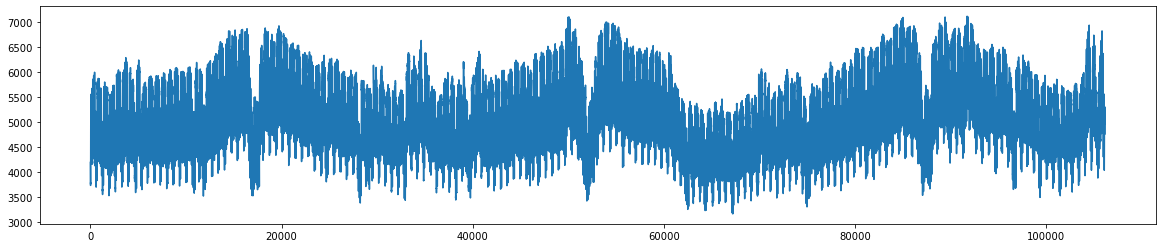

In [13]:
df['rendszerterheles'].plot(figsize=(20, 4))

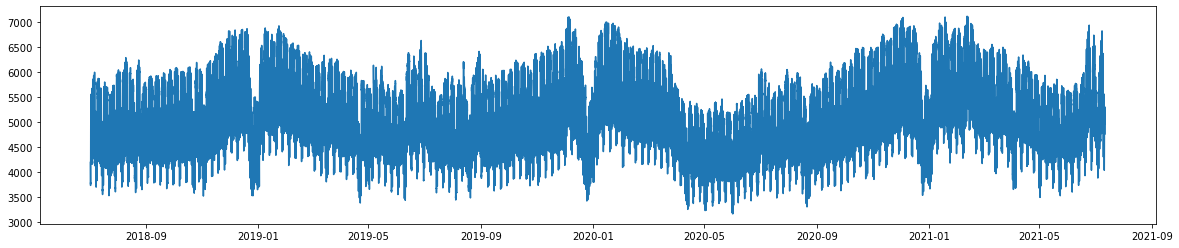

In [14]:
plt.figure(figsize=(20, 4))
plt.plot(df['datetime'], df['rendszerterheles'])

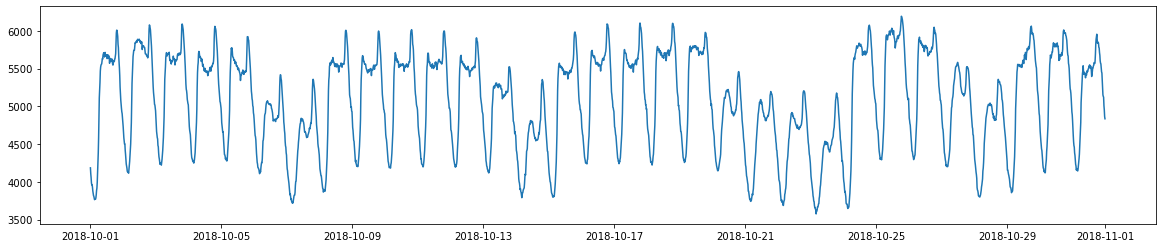

In [15]:
plot_df = df.set_index('datetime').loc['2018-10', :]
plt.figure(figsize=(20,4))
plt.plot(plot_df.index, plot_df['rendszerterheles'])

In [16]:
df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek

<AxesSubplot:xlabel='month'>

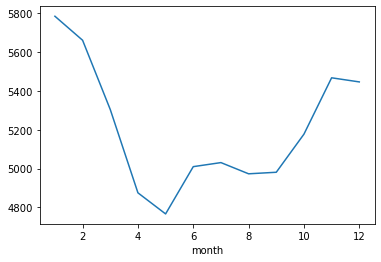

In [17]:
df.groupby('month')['rendszerterheles'].mean().plot()

<AxesSubplot:xlabel='dayofweek'>

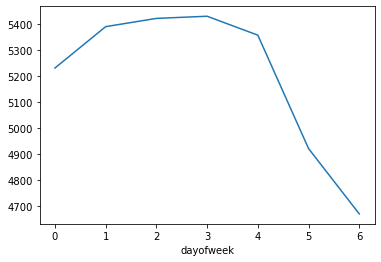

In [18]:
df.groupby('dayofweek')['rendszerterheles'].mean().plot()

<AxesSubplot:xlabel='dayofweek,time'>

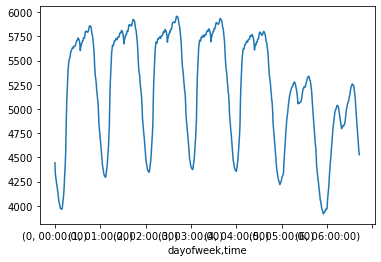

In [19]:
df.groupby(['dayofweek', 'time'])['rendszerterheles'].mean().plot()

<AxesSubplot:xlabel='datetime'>

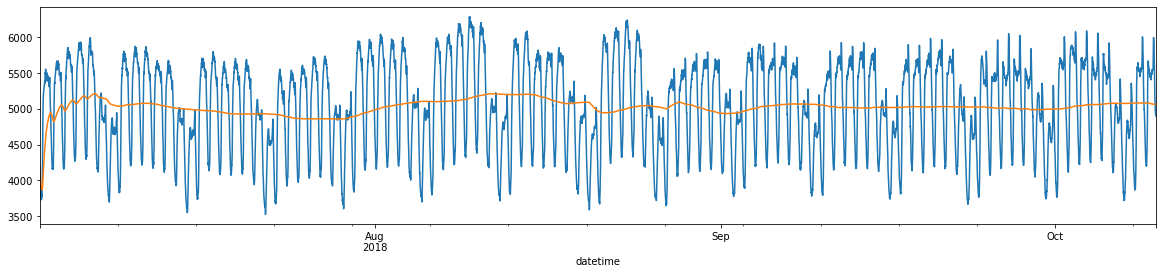

In [20]:
df.set_index('datetime')['rendszerterheles'][:9600].plot(figsize=(20, 4))
df.set_index('datetime')['rendszerterheles'].rolling('7d').mean()\
[:9600].plot(figsize=(20, 4))

<AxesSubplot:xlabel='datetime'>

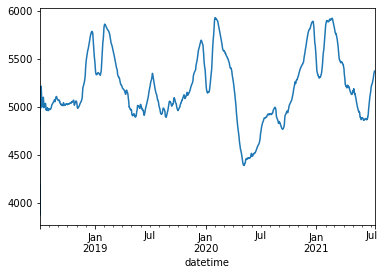

In [21]:
df.set_index('datetime')['rendszerterheles'].rolling('28d').mean()\
.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

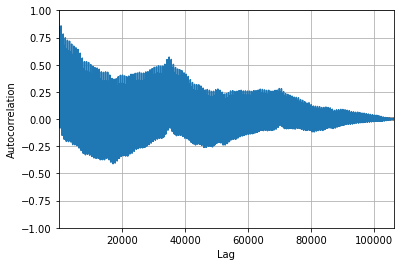

In [22]:
pd.plotting.autocorrelation_plot(df['rendszerterheles'])

In [23]:
import tqdm

In [24]:
autocorr_list = []
for i in tqdm.tqdm(range(960)):
    autocorr = df['rendszerterheles'].autocorr(i)
    autocorr_list.append(autocorr)

100%|██████████| 960/960 [00:02<00:00, 373.52it/s]


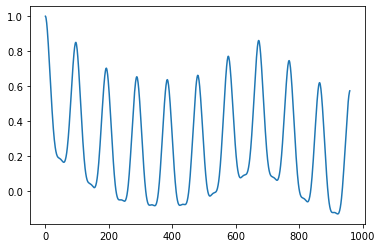

In [25]:
plt.plot(autocorr_list)

In [26]:
df['datetime-2d'] = df['datetime'] + pd.to_timedelta(-2, unit='day')
df['datetime-7d'] = df['datetime'] + pd.to_timedelta(-7, unit='day')

In [27]:
terheles_map = df.set_index('datetime')['rendszerterheles']

In [28]:
df['rendszerterheles-2d'] = df['datetime-2d'].map(terheles_map)
df['rendszerterheles-7d'] = df['datetime-7d'].map(terheles_map)

In [29]:
df.isnull().sum()

datetime                 0
rendszerterheles         0
date                     0
time                     0
month                    0
dayofweek                0
datetime-2d              0
datetime-7d              0
rendszerterheles-2d    192
rendszerterheles-7d    672
dtype: int64

In [30]:
df = df.dropna().reset_index(drop=True)

In [31]:
df

,datetime,rendszerterheles,date,time,month,dayofweek,datetime-2d,datetime-7d,rendszerterheles-2d,rendszerterheles-7d
0,2018-07-09 00:00:00,4276.0,2018-07-09,00:00:00,7,0,2018-07-07 00:00:00,2018-07-02 00:00:00,4914.0,4191.0
1,2018-07-09 00:15:00,4153.0,2018-07-09,00:15:00,7,0,2018-07-07 00:15:00,2018-07-02 00:15:00,4797.0,4116.0
2,2018-07-09 00:30:00,4150.0,2018-07-09,00:30:00,7,0,2018-07-07 00:30:00,2018-07-02 00:30:00,4726.0,4060.0
3,2018-07-09 00:45:00,4114.0,2018-07-09,00:45:00,7,0,2018-07-07 00:45:00,2018-07-02 00:45:00,4662.0,4025.0
4,2018-07-09 01:00:00,4081.0,2018-07-09,01:00:00,7,0,2018-07-07 01:00:00,2018-07-02 01:00:00,4602.0,3976.0
...,...,...,...,...,...,...,...,...,...,...
105499,2021-07-11 22:45:00,5009.0,2021-07-11,22:45:00,7,6,2021-07-09 22:45:00,2021-07-04 22:45:00,5596.0,4932.0
105500,2021-07-11 23:00:00,4908.0,2021-07-11,23:00:00,7,6,2021-07-09 23:00:00,2021-07-04 23:00:00,5495.0,4849.0
105501,2021-07-11 23:15:00,4839.0,2021-07-11,23:15:00,7,6,2021-07-09 23:15:00,2021-07-04 23:15:00,5456.0,4781.0
105502,2021-07-11 23:30:00,4807.0,2021-07-11,23:30:00,7,6,2021-07-09 23:30:00,2021-07-04 23:30:00,5377.0,4704.0


In [32]:
from workalendar.europe import Hungary

In [33]:
cal = Hungary()

In [34]:
cal.holidays(2021)

[(datetime.date(2021, 1, 1), 'New year'),
 (datetime.date(2021, 3, 15), 'National Day'),
 (datetime.date(2021, 4, 2), 'Good Friday'),
 (datetime.date(2021, 4, 4), 'Easter Sunday'),
 (datetime.date(2021, 4, 5), 'Easter Monday'),
 (datetime.date(2021, 5, 1), 'Labour Day'),
 (datetime.date(2021, 5, 23), 'Pentecost Sunday'),
 (datetime.date(2021, 5, 24), 'Pentecost Monday'),
 (datetime.date(2021, 8, 20), "St Stephen's Day"),
 (datetime.date(2021, 10, 23), 'National Day'),
 (datetime.date(2021, 11, 1), 'All Saints Day'),
 (datetime.date(2021, 12, 25), 'Christmas Day'),
 (datetime.date(2021, 12, 26), 'Second Day of Christmas')]

In [35]:
year_list = df['datetime'].dt.year.unique()

In [36]:
year_list

array([2018, 2019, 2020, 2021])

In [37]:
holiday_df = pd.DataFrame()
for year in year_list:
    holidays = cal.holidays(year)
    temp_df = pd.DataFrame(holidays, columns=['date', 'holiday_name'])
    holiday_df = pd.concat([holiday_df, temp_df],
                           axis=0).reset_index(drop=True)

In [38]:
holiday_map = holiday_df.set_index('date')['holiday_name']

In [39]:
df['holiday_name'] = df['date'].map(holiday_map)

In [40]:
df['is_holiday'] = 0
df.loc[df['holiday_name'].notnull(), 'is_holiday'] = 1

In [41]:
# model

In [91]:
model = GradientBoostingRegressor(random_state=1)

In [44]:
month_dummies =\
pd.get_dummies(df['month'], prefix='month', drop_first=True)

In [45]:
dayofweek_dummies =\
pd.get_dummies(df['dayofweek'], prefix='dayofweek', drop_first=True)

In [46]:
df = pd.concat([df, month_dummies, dayofweek_dummies], axis=1)

In [47]:
df.head(1)

,datetime,rendszerterheles,date,time,month,dayofweek,datetime-2d,datetime-7d,rendszerterheles-2d,rendszerterheles-7d,...,month_9,month_10,month_11,month_12,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2018-07-09,4276.0,2018-07-09,00:00:00,7,0,2018-07-07,2018-07-02,4914.0,4191.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dummy_columns =\
month_dummies.columns.tolist() + dayofweek_dummies.columns.tolist()

In [84]:
X_cols = ['rendszerterheles-2d', 'rendszerterheles-7d', 'is_holiday'] + dummy_columns
y_col = 'rendszerterheles'

In [85]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

In [86]:
X_train = X.loc[:80000, :]
X_test = X.loc[80001:, :]

y_train = y.loc[:80000]
y_test = y.loc[80001:]

In [92]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [93]:
pred = model.predict(X_test)

In [97]:
mean_absolute_percentage_error(y_test[:96], pred[:96])

0.026814149073630444

In [102]:
mean_absolute_percentage_error(y_test[:96], X_test['rendszerterheles-2d'].values[:96])

0.09543018915048318

In [103]:
mean_absolute_percentage_error(y_test[:96], X_test['rendszerterheles-7d'].values[:96])

0.029374774907352446

In [96]:
mean_absolute_percentage_error(y_test, pred)

0.041572779217129374

In [94]:
pred_df = pd.DataFrame()
pred_df['act'] = y_test
pred_df['pred'] = pred

<AxesSubplot:>

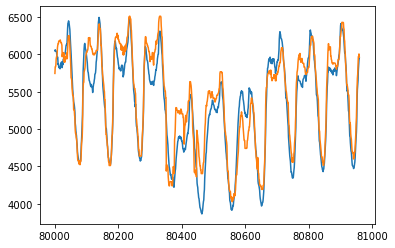

In [95]:
pred_df['act'][:960].plot()
pred_df['pred'][:960].plot()

In [56]:
test_date = pd.date_range('2021-02-01', '2021-02-03')

In [57]:
model = GradientBoostingRegressor(n_estimators=1, random_state=1)
pred_df = pd.DataFrame()
for date in test_date:
    df_train = df.loc[df['datetime']<date]
    df_test = df.loc[df['datetime'].dt.date==date]
    
    X_train = df_train.loc[:, X_cols]
    X_test = df_test.loc[:, X_cols]
    y_train = df_train.loc[:, y_col]
    y_test = df_test.loc[:, y_col]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    temp_df = pd.DataFrame()
    temp_df['act'] = y_test
    temp_df['pred'] = pred
    temp_df['datetime'] = df_test['datetime']
    pred_df = pd.concat([pred_df, temp_df], axis=0).reset_index(drop=True)

In [58]:
pred_df

,act,pred,datetime
0,5031.0,5144.031697,2021-02-01 00:00:00
1,4874.0,5144.031697,2021-02-01 00:15:00
2,4839.0,5144.031697,2021-02-01 00:30:00
3,4809.0,5144.031697,2021-02-01 00:45:00
4,4788.0,5144.031697,2021-02-01 01:00:00
...,...,...,...
283,5854.0,5236.612415,2021-02-03 22:45:00
284,5775.0,5236.612415,2021-02-03 23:00:00
285,5705.0,5236.612415,2021-02-03 23:15:00
286,5627.0,5236.612415,2021-02-03 23:30:00
